In [17]:
import pandas as pd
import numpy as np

In [18]:

df = pd.read_csv("/Users/ashriththallam/Documents/ECEN360/healthcare-dataset-stroke-data.csv")

# Dropping irrelevant columns
if 'id' in df.columns:
    df = df.drop('id', axis=1)

# Handling missing values - filling missing BMI values with the median BMI
df['bmi'].fillna(df['bmi'].median(), inplace=True)

# One-hot encode categorical variables 
df_encoded = pd.get_dummies(df, drop_first=True)

# Displaying the first few columns of the encoded dataframe to verify encoding
print("Encoded dataframe columns:", list(df_encoded.columns)[:10], "...")
print("Shape of encoded data:", df_encoded.shape)


Encoded dataframe columns: ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke', 'gender_Male', 'gender_Other', 'ever_married_Yes', 'work_type_Never_worked'] ...
Shape of encoded data: (5110, 17)


/var/folders/1d/dmxwwbwj3flc5n6rz5x92qr40000gn/T/ipykernel_13992/961167385.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


# EDA / Graphs

Correlation with stroke:
 stroke                            1.000000
age                               0.245257
heart_disease                     0.134914
avg_glucose_level                 0.131945
hypertension                      0.127904
ever_married_Yes                  0.108340
smoking_status_formerly smoked    0.064556
work_type_Self-employed           0.062168
bmi                               0.036110
Residence_type_Urban              0.015458
Name: stroke, dtype: float64


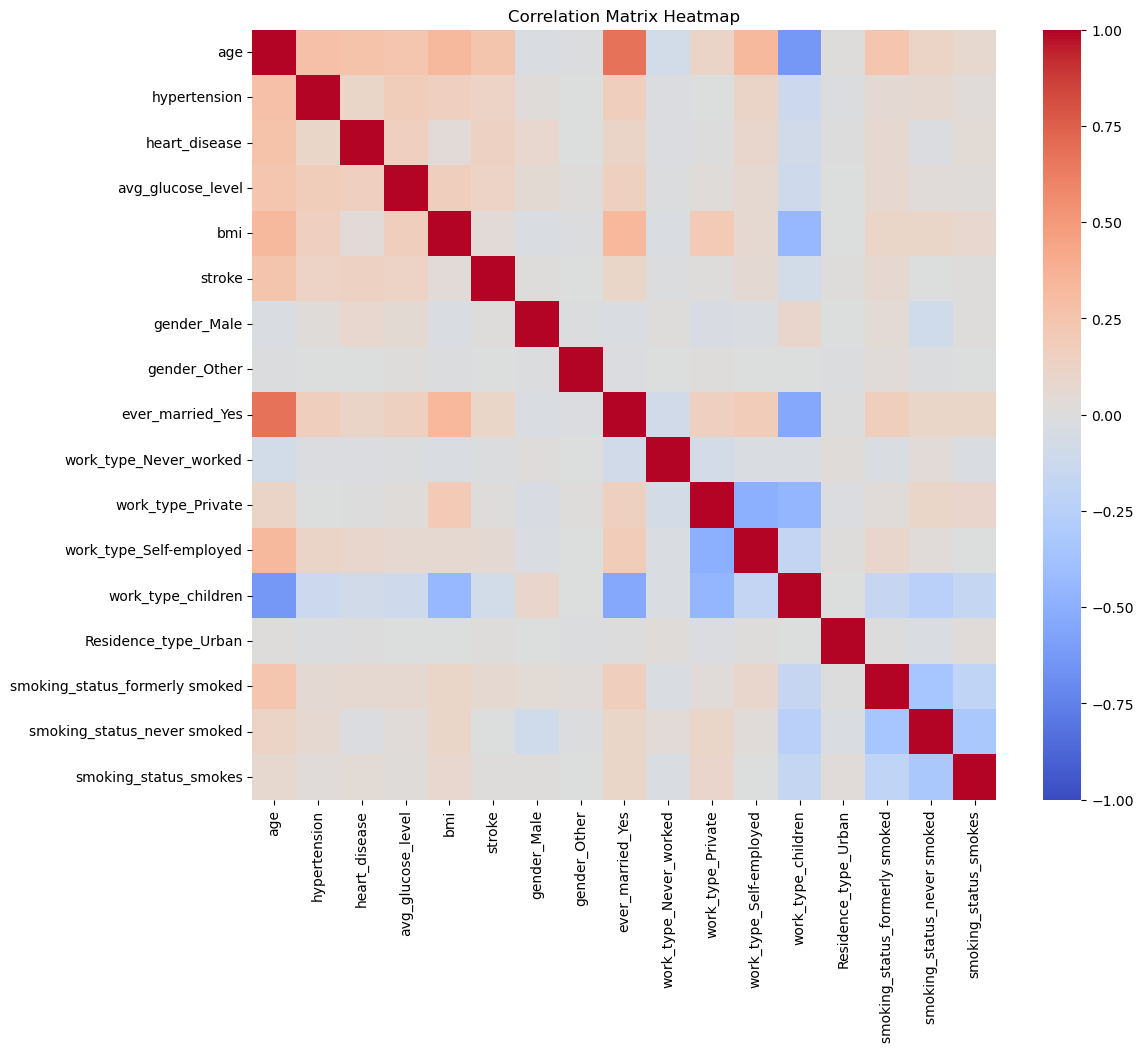

In [20]:
# Making a correlation matrix for all features (including stroke)
corr_matrix = df_encoded.corr()

# Shows the correlation of the first few features
print("Correlation with stroke:\n", corr_matrix["stroke"].sort_values(ascending=False).head(10))



import seaborn as sns
import matplotlib.pyplot as plt

# Setting up the matplotlib figure
plt.figure(figsize=(12, 10))

# Plotting the heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, vmax=1.0, vmin=-1.0)
plt.title("Correlation Matrix Heatmap")
plt.show()


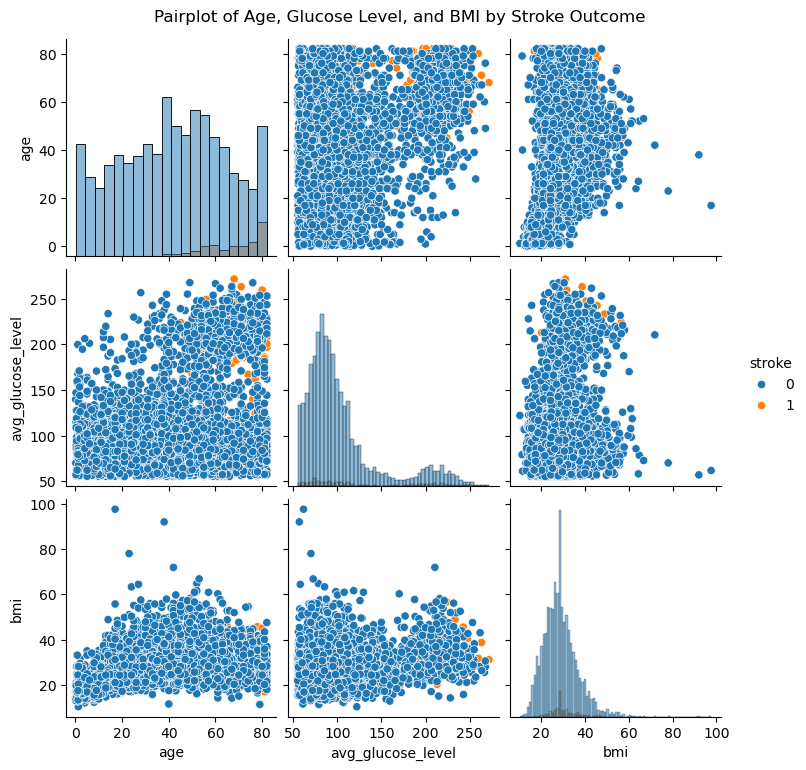

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
# Pairplot
sns.pairplot(df, vars=['age', 'avg_glucose_level', 'bmi'], hue='stroke', diag_kind='hist')
plt.suptitle("Pairplot of Age, Glucose Level, and BMI by Stroke Outcome", y=1.02)
plt.show()

/var/folders/1d/dmxwwbwj3flc5n6rz5x92qr40000gn/T/ipykernel_13992/3981068746.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='hypertension', y='bmi', data=df, palette='Pastel1')
/var/folders/1d/dmxwwbwj3flc5n6rz5x92qr40000gn/T/ipykernel_13992/3981068746.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='stroke', y='avg_glucose_level', data=df, palette='Set2')


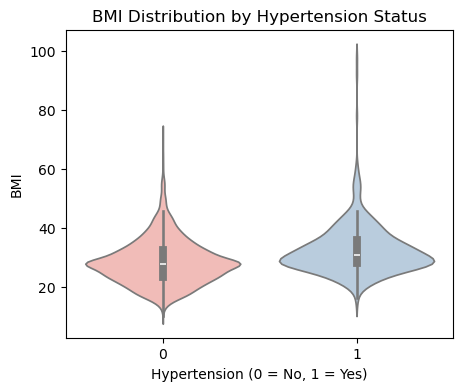

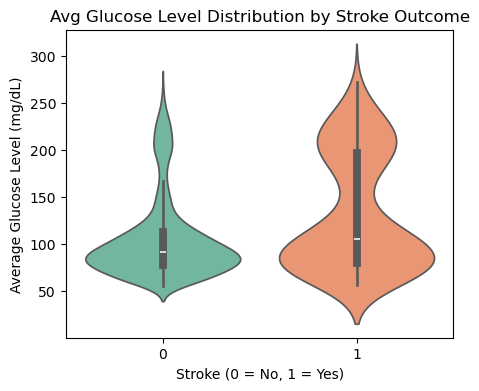

/var/folders/1d/dmxwwbwj3flc5n6rz5x92qr40000gn/T/ipykernel_13992/3981068746.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y='age', data=df, palette='Blues')
/var/folders/1d/dmxwwbwj3flc5n6rz5x92qr40000gn/T/ipykernel_13992/3981068746.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y='avg_glucose_level', data=df, palette='Greens')


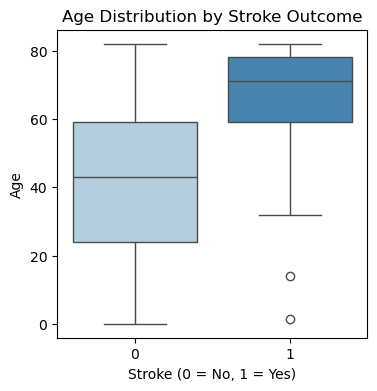

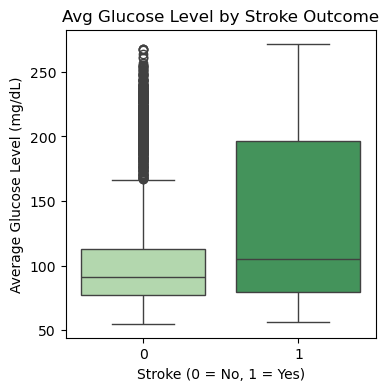

In [22]:
# Violin plot of BMI distribution by hypertension status
plt.figure(figsize=(5,4))
sns.violinplot(x='hypertension', y='bmi', data=df, palette='Pastel1')
plt.title("BMI Distribution by Hypertension Status")
plt.xlabel("Hypertension (0 = No, 1 = Yes)")
plt.ylabel("BMI")

# Violin plot of Avg Glucose distribution by stroke outcome 
plt.figure(figsize=(5,4))
sns.violinplot(x='stroke', y='avg_glucose_level', data=df, palette='Set2')
plt.title("Avg Glucose Level Distribution by Stroke Outcome")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Average Glucose Level (mg/dL)")
plt.show()

# Box plot of Age by Stroke outcome
plt.figure(figsize=(4,4))
sns.boxplot(x='stroke', y='age', data=df, palette='Blues')
plt.title("Age Distribution by Stroke Outcome")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Age")

# Box plot of Average Glucose Level by Stroke outcome
plt.figure(figsize=(4,4))
sns.boxplot(x='stroke', y='avg_glucose_level', data=df, palette='Greens')
plt.title("Avg Glucose Level by Stroke Outcome")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Average Glucose Level (mg/dL)")
plt.show()

# Untuned Machine Learning Testing Models

In [24]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('stroke', axis=1)
y = df['stroke']

# Split into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle missing values in BMI (use median of training data)
median_bmi = X_train['bmi'].median()
X_train['bmi'].fillna(median_bmi, inplace=True)
X_test['bmi'].fillna(median_bmi, inplace=True)

# One-hot encode categorical variables on training and test sets
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align the test set's columns with the training set (this handles any category missing in training or test)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Feature scaling for numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_features = ['age', 'avg_glucose_level', 'bmi']  # continuous numeric fields to scale

X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

print("Training set shape after encoding:", X_train.shape)
print("Testing set shape after encoding:", X_test.shape)

Training set shape after encoding: (4088, 16)
Testing set shape after encoding: (1022, 16)


/var/folders/1d/dmxwwbwj3flc5n6rz5x92qr40000gn/T/ipykernel_13992/3130244468.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['bmi'].fillna(median_bmi, inplace=True)
/var/folders/1d/dmxwwbwj3flc5n6rz5x92qr40000gn/T/ipykernel_13992/3130244468.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Initialize the models
log_reg = LogisticRegression(max_iter=1000, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train/Fit the models on the training data
log_reg.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred_log = log_reg.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)

# Calculate evaluation metrics for Logistic Regression
acc_log = accuracy_score(y_test, y_pred_log)
prec_log = precision_score(y_test, y_pred_log)
rec_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)

# Calculate evaluation metrics for Random Forest
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Print the results
print(f"Logistic Regression - Accuracy: {acc_log:.3f}, Precision: {prec_log:.3f}, Recall: {rec_log:.3f}, F1-score: {f1_log:.3f}")
print(f"Random Forest       - Accuracy: {acc_rf:.3f}, Precision: {prec_rf:.3f}, Recall: {rec_rf:.3f}, F1-score: {f1_rf:.3f}")

Logistic Regression - Accuracy: 0.952, Precision: 1.000, Recall: 0.020, F1-score: 0.039
Random Forest       - Accuracy: 0.948, Precision: 0.000, Recall: 0.000, F1-score: 0.000


# SOMTE + GRIDSEARCH PIPLINE

In [28]:
# SMOTE + RandomizedSearchCV with expanded hyperparameter space
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import precision_recall_curve

# Defining pipelines
pipe_lr = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scale', StandardScaler()),
    ('clf',   LogisticRegression(solver='saga', max_iter=5000, random_state=42))
])
pipe_rf = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf',   RandomForestClassifier(random_state=42))
])

# Expanded hyper-parameter distributions
param_dist_lr = {
    'clf__penalty':      ['l1', 'l2'],
    'clf__C':            [0.001, 0.01, 0.1, 1, 10],
    'clf__class_weight': ['balanced', None]
}

param_dist_rf = {
    'clf__n_estimators':     [100, 200, 300, 500],
    'clf__max_depth':        [5, 10, 15, 20],
    'clf__min_samples_split':[2, 5, 10],
    'clf__class_weight':     ['balanced', 'balanced_subsample', None]
}

# Randomized search setup
cv3 = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

rs_lr = RandomizedSearchCV(
    pipe_lr, param_dist_lr,
    n_iter=10,              
    scoring='f1',
    cv=cv3, n_jobs=-1, verbose=2,
    random_state=42
)

rs_rf = RandomizedSearchCV(
    pipe_rf, param_dist_rf,
    n_iter=20,              
    scoring='f1',
    cv=cv3, n_jobs=-1, verbose=2,
    random_state=42
)

# Fitting & printing best parameters
rs_lr.fit(X_train, y_train)
rs_rf.fit(X_train, y_train)

print("Best LR params:", rs_lr.best_params_)
print("Best RF params:", rs_rf.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best LR params: {'clf__penalty': 'l1', 'clf__class_weight': 'balanced', 'clf__C': 0.001}
Best RF params: {'clf__n_estimators': 200, 'clf__min_samples_split': 10, 'clf__max_depth': 10, 'clf__class_weight': None}


In [29]:
from sklearn.metrics import classification_report, roc_auc_score

# Grabbing the best estimators
best_lr = rs_lr.best_estimator_
best_rf = rs_rf.best_estimator_

# Predicted on X_test
y_pred_lr  = best_lr.predict(X_test)
y_proba_lr = best_lr.predict_proba(X_test)[:,1]

y_pred_rf  = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)[:,1]

# Printing classification reports and ROC-AUC
print("=== Logistic Regression (tuned) ===")
print(classification_report(y_test, y_pred_lr, digits=4))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_lr))

print("\n=== Random Forest (tuned) ===")
print(classification_report(y_test, y_pred_rf, digits=4))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))

# Inspect internals
# Non-zero LR coefficients
lr_coefs = pd.Series(
    best_lr.named_steps['clf'].coef_[0],
    index=X_train.columns
).loc[lambda s: s!=0].sort_values(key=abs, ascending=False)

print("\nTop non-zero Logistic Regression coefficients:")
print(lr_coefs)

# RF feature importances
rf_imps = pd.Series(
    best_rf.named_steps['clf'].feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

print("\nRandom Forest feature importances:")
print(rf_imps)

=== Logistic Regression (tuned) ===
              precision    recall  f1-score   support

           0     0.9884    0.7037    0.8221       972
           1     0.1273    0.8400    0.2211        50

    accuracy                         0.7104      1022
   macro avg     0.5579    0.7719    0.5216      1022
weighted avg     0.9463    0.7104    0.7927      1022

ROC-AUC: 0.8341872427983539

=== Random Forest (tuned) ===
              precision    recall  f1-score   support

           0     0.9736    0.8354    0.8992       972
           1     0.1489    0.5600    0.2353        50

    accuracy                         0.8219      1022
   macro avg     0.5613    0.6977    0.5673      1022
weighted avg     0.9333    0.8219    0.8667      1022

ROC-AUC: 0.7916049382716049

Top non-zero Logistic Regression coefficients:
age    0.761087
dtype: float64

Random Forest feature importances:
age                               4.789466e-01
avg_glucose_level                 1.242887e-01
bmi           

In [30]:
lr_probas = best_lr.predict_proba(X_test)[:, 1]
results = []

# trying thresholds from 0.0 up to 0.5
for thresh in np.linspace(0, 0.5, 51):
    preds = (lr_probas >= thresh).astype(int)
    rec  = recall_score(y_test, preds)
    prec = precision_score(y_test, preds, zero_division=0)
    f1   = f1_score(y_test, preds)
    results.append((thresh, rec, prec, f1))

df_lr = pd.DataFrame(results, columns=['threshold','recall','precision','f1'])
# Finding the lowest threshold giving ≥ 0.90 recall
candidates = df_lr[df_lr.recall >= 0.90]
if not candidates.empty:
    best = candidates.iloc[0]
    print(f"Threshold {best.threshold:.2f} → Recall {best.recall:.3f}, Precision {best.precision:.3f}, F1 {best.f1:.3f}")
else:
    best = df_lr.iloc[df_lr.recall.idxmax()]
    print(f"No threshold hits 0.90 recall; best is {best.threshold:.2f} (recall={best.recall:.3f})")

Threshold 0.00 → Recall 1.000, Precision 0.049, F1 0.093


In [31]:

from sklearn.metrics import balanced_accuracy_score

# Computed LR probabilities
lr_probas = best_lr.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, lr_probas)

# Evaluated balanced accuracy at each threshold
best_bal_acc = 0
best_thr     = 0
for thr in thresholds:
    preds = (lr_probas >= thr).astype(int)
    bal_acc = balanced_accuracy_score(y_test, preds)
    if bal_acc > best_bal_acc:
        best_bal_acc = bal_acc
        best_thr     = thr

print(f"Best balanced‐accuracy threshold: {best_thr:.3f} → Balanced Acc: {best_bal_acc:.3f}")

# Deploying at that threshold
final_preds = (lr_probas >= best_thr).astype(int)
print("\n=== Final LR @ max‐BalancedAccuracy threshold ===")
print(classification_report(y_test, final_preds, digits=4))
print("ROC-AUC:", roc_auc_score(y_test, lr_probas))

Best balanced‐accuracy threshold: 0.511 → Balanced Acc: 0.780

=== Final LR @ max‐BalancedAccuracy threshold ===
              precision    recall  f1-score   support

           0     0.9887    0.7191    0.8326       972
           1     0.1333    0.8400    0.2301        50

    accuracy                         0.7250      1022
   macro avg     0.5610    0.7796    0.5314      1022
weighted avg     0.9468    0.7250    0.8032      1022

ROC-AUC: 0.8341872427983539


In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, final_preds)
print("Confusion matrix:\n", cm)

Confusion matrix:
 [[699 273]
 [  8  42]]


# Final Model

In [34]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
# Building the pipeline
pipe_hgb = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf',   HistGradientBoostingClassifier(random_state=42))
])

# Hyperparameter distributions
param_dist_hgb = {
    'clf__max_iter':          [100, 200, 500],
    'clf__max_depth':         [3, 5, 10],
    'clf__learning_rate':     [0.01, 0.1, 0.2],
    'clf__max_bins':          [128, 255],
    'clf__l2_regularization': [0.0, 0.1, 1.0]
}

# RandomizedSearch setup
cv3 = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
rs_hgb = RandomizedSearchCV(
    pipe_hgb,
    param_dist_hgb,
    n_iter=20,
    scoring='f1',
    cv=cv3,
    n_jobs=-1,
    verbose=2,
    random_state=42
)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [35]:
# Fit and show the best params
rs_hgb.fit(X_train, y_train)
print("Best HGB params:", rs_hgb.best_params_)


best_hgb    = rs_hgb.best_estimator_
y_pred_hgb  = best_hgb.predict(X_test)
y_proba_hgb = best_hgb.predict_proba(X_test)[:, 1]

print("\n=== HistGradientBoostingClassifier (tuned) ===")
print(classification_report(y_test, y_pred_hgb, digits=4))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_hgb))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best HGB params: {'clf__max_iter': 100, 'clf__max_depth': 10, 'clf__max_bins': 255, 'clf__learning_rate': 0.01, 'clf__l2_regularization': 0.0}

=== HistGradientBoostingClassifier (tuned) ===
              precision    recall  f1-score   support

           0     0.9786    0.8004    0.8806       972
           1     0.1454    0.6600    0.2383        50

    accuracy                         0.7935      1022
   macro avg     0.5620    0.7302    0.5594      1022
weighted avg     0.9379    0.7935    0.8492      1022

ROC-AUC: 0.798611111111111


In [36]:
from sklearn.ensemble import StackingClassifier
#  Reusing the tuned base estimators
estimators = [
    ('lr',  rs_lr.best_estimator_),
    ('rf',  rs_rf.best_estimator_),
    ('hgb', rs_hgb.best_estimator_)
]

# Building the stack
stack = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(solver='liblinear', random_state=42),
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    n_jobs=-1,
    passthrough=False
)

stack.fit(X_train, y_train)

StackingClassifier(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimators=[('lr',
                                Pipeline(steps=[('smote',
                                                 SMOTE(random_state=42)),
                                                ('scale', StandardScaler()),
                                                ('clf',
                                                 LogisticRegression(C=0.001,
                                                                    class_weight='balanced',
                                                                    max_iter=5000,
                                                                    penalty='l1',
                                                                    random_state=42,
                                                                    solver='saga'))])),
                               ('rf',
                                Pipeline(steps=[('smote',
                                                 SMOTE(random_state=42)),
                                                ('clf',
                                                 RandomForestClassifier(max_depth=10,
                                                                        min_samples_split=10,
                                                                        n_estimators=200,
                                                                        random_state=42))])),
                               ('hgb',
                                Pipeline(steps=[('smote',
                                                 SMOTE(random_state=42)),
                                                ('clf',
                                                 HistGradientBoostingClassifier(learning_rate=0.01,
                                                                                max_depth=10,
                                                                                random_state=42))]))],
                   final_estimator=LogisticRegression(random_state=42,
                                                      solver='liblinear'),
                   n_jobs=-1)

In [37]:

# Getting stack probabilities
y_proba_stack = stack.predict_proba(X_test)[:, 1]

candidates = []
for thr in np.linspace(0, 1, 101):
    preds = (y_proba_stack >= thr).astype(int)
    rec1  = recall_score(y_test, preds)                    # stroke recall
    rec0  = recall_score(y_test, preds, pos_label=0)       # no-stroke recall
    if rec1 >= 0.70 and rec0 >= 0.70:
        candidates.append((thr, rec0, rec1))

if not candidates:
    print("No threshold gives ≥70% recall on both classes for the stacked model.")
else:
    # Picked the threshold maximizing the smaller recall
    best_thr, best_rec0, best_rec1 = max(candidates, key=lambda x: min(x[1], x[2]))
    print(f"Selected threshold = {best_thr:.2f} → Recall₀ = {best_rec0:.3f}, Recall₁ = {best_rec1:.3f}")

    # Evaluated at that threshold
    final_preds = (y_proba_stack >= best_thr).astype(int)
    print("\n=== Stacked model ===")
    print(classification_report(y_test, final_preds, digits=4))
    print("ROC-AUC:", roc_auc_score(y_test, y_proba_stack))

Selected threshold = 0.07 → Recall₀ = 0.748, Recall₁ = 0.760

=== Stacked model ===
              precision    recall  f1-score   support

           0     0.9838    0.7479    0.8498       972
           1     0.1343    0.7600    0.2282        50

    accuracy                         0.7485      1022
   macro avg     0.5590    0.7540    0.5390      1022
weighted avg     0.9422    0.7485    0.8194      1022

ROC-AUC: 0.8281687242798355
